# 特征選擇

- 特征重要性

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_california_housing
import pandas as pd

[0.51989279 0.05275293 0.04537689 0.02922638 0.0316115  0.13638325
 0.09339769 0.09135856]


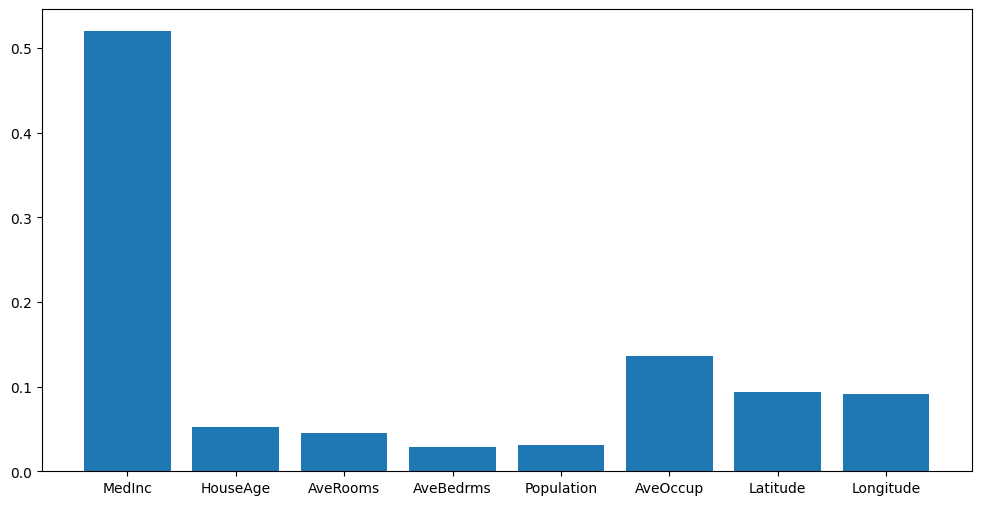

In [5]:
data = fetch_california_housing()
rf = RandomForestRegressor()
rf.fit(data.data, data.target)
print(rf.feature_importances_)

plt.figure(figsize=(12,6))
plt.bar(range(1, 9), rf.feature_importances_)
_  = plt.xticks(range(1,9), data.feature_names)

- 利用方差

In [17]:
from sklearn.feature_selection import VarianceThreshold
X = [[0,0,1], [0,1,0], [1,0,0], [0,1,1], [0,1,0], [0,1,1]]
sel = VarianceThreshold(threshold=(.8 * (1- .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

- 利用相關性

In [19]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2, f_regression

sel = SelectKBest(f_regression, k='all').fit(data.data, data.target)
sel.fit_transform(data.data, data.target)
print(data.feature_names)
print(sel.scores_)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[1.85565716e+04 2.32841479e+02 4.87757462e+02 4.51085756e+01
 1.25474103e+01 1.16353421e+01 4.38005453e+02 4.36989761e+01]


- 利用線性模型

In [20]:
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVR().fit(data.data, data.target)
print(data.feature_names)
print(lsvc.coef_)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[ 2.84239338e-01  9.23454437e-03  5.83714722e-02 -2.31438403e-01
 -1.19929382e-04 -8.95115200e-02 -1.59884739e-01 -5.34315625e-02]


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


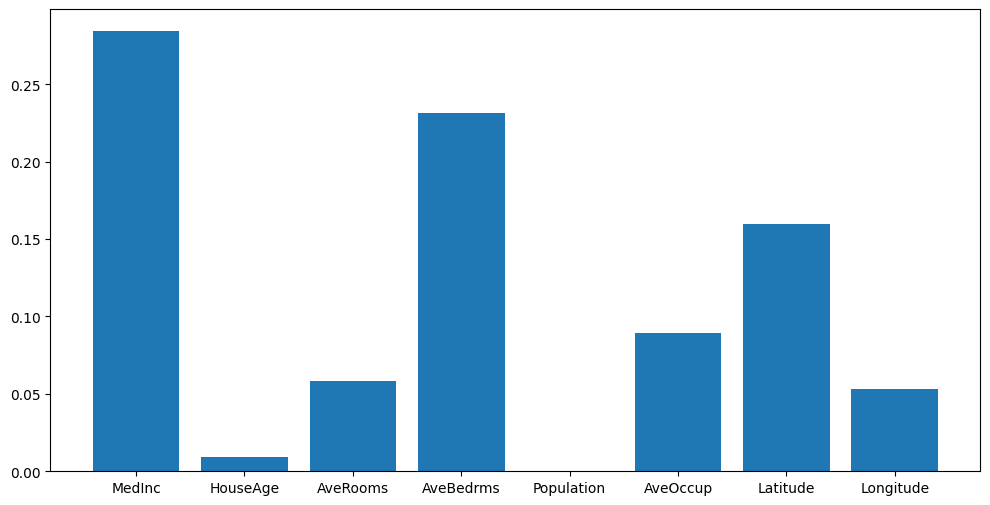

In [22]:
plt.figure(figsize=(12,6))
plt.bar(range(data.data.shape[1]), np.abs(lsvc.coef_))
_  = plt.xticks(range(data.data.shape[1]), data.feature_names)

- Permutation Importance

將特征隨機打亂後計算模型精度的差異，並將其作為特征重要性

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.inspection import permutation_importance
clf = RandomForestRegressor().fit(data.data, data.target)
result = permutation_importance(clf, data.data, data.target, n_repeats=10,
                                random_state=123)
result.importances_mean

array([0.86847187, 0.12010818, 0.07101166, 0.03579417, 0.03443667,
       0.29823603, 0.54683758, 0.43373211])

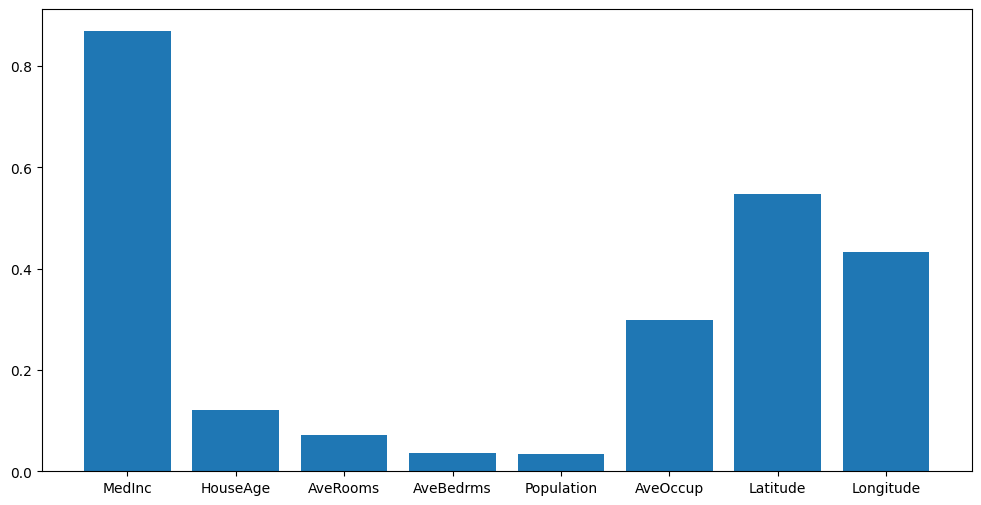

In [24]:
plt.figure(figsize=(12,6))
plt.bar(range(data.data.shape[1]), result.importances_mean)
_ = plt.xticks(range(data.data.shape[1]), data.feature_names)

- Null Importance

将标签多次乱序后，对比原始特征与打乱标签后的特征重要性

In [26]:
def get_feature_importances(data, target, feature_name, shuffle, seed=None):
    # shuffle target if required
    y = target.copy()
    if shuffle:
        np.random.shuffle(y)
    clf = RandomForestRegressor()
    clf.fit(data, y)
    imp_df = pd.DataFrame()
    imp_df['feature'] = feature_name
    imp_df['importance_gain'] = clf.feature_importances_

    return imp_df

In [27]:
# 記錄正常標籤下的特征重要性
tual_imp_df = get_feature_importances(data.data, data.target, data.feature_names,False)

In [28]:
null_imp_df = pd.DataFrame()
nb_runs = 40
import time
start = time.time()
dsp = ''
for i in range(nb_runs):
    imp_df = get_feature_importances(data.data, data.target, data.feature_names, True)
    imp_df['run'] = i+1
    
    # concat the latest importances with the old ones
    null_imp_df = pd.concat([null_imp_df, imp_df],axis=0)
    
    # Erase previous message
    for l in range(len(dsp)):
        print('\b',end='',flush=True)
    spent = (time.time()-start)/60
    dsp = f'Done with {i+1} of {nb_runs} (Spent {spent} min)'
    print(dsp)

Done with 1 of 40 (Spent 0.32259250481923424 min)
Done with 2 of 40 (Spent 0.6837167938550314 min)
Done with 3 of 40 (Spent 1.066093623638153 min)
Done with 4 of 40 (Spent 1.426913817723592 min)
Done with 5 of 40 (Spent 1.7755911469459533 min)
Done with 6 of 40 (Spent 2.1339481472969055 min)
Done with 7 of 40 (Spent 2.5277724385261537 min)
Done with 8 of 40 (Spent 2.8928892652193707 min)
Done with 9 of 40 (Spent 3.247621011734009 min)
Done with 10 of 40 (Spent 3.6147567431131997 min)
Done with 11 of 40 (Spent 4.007596397399903 min)
Done with 12 of 40 (Spent 5.092935601870219 min)
Done with 13 of 40 (Spent 6.1184082667032875 min)
Done with 14 of 40 (Spent 6.465352408091227 min)
Done with 15 of 40 (Spent 6.82682968378067 min)
Done with 16 of 40 (Spent 7.20657407840093 min)
Done with 17 of 40 (Spent 7.556644026438395 min)
Done with 18 of 40 (Spent 7.899934415022532 min)
Done with 19 of 40 (Spent 8.244051750500997 min)
Done with 20 of 40 (Spent 8.603406369686127 min)
Done with 21 o

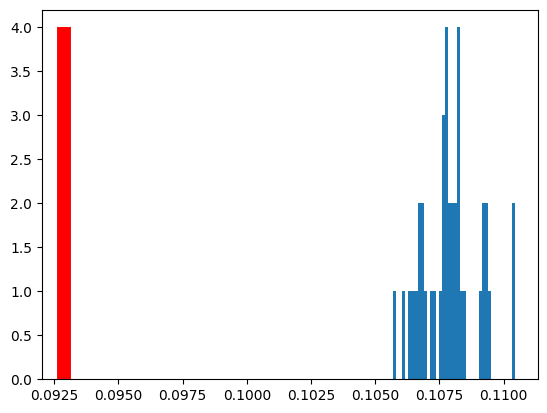

In [30]:
feat = 'Longitude'
ax = plt.hist(null_imp_df[null_imp_df['feature'] == feat]['importance_gain'],
              bins=nb_runs)
plt.vlines(x=tual_imp_df.loc[tual_imp_df['feature']==feat,'importance_gain'].mean(),
           ymin=0, ymax=np.max(ax[0]),color='r',linewidth=10,label='Real Target')

紅色bar代表原始特征重要性，由上圖可得Longtitude的原始特征重要性要遠遠小於亂序後的重要性，說明該特征並不特別重要